In [1]:
import pandas as pd
import requests
import re

**1**. Using `requests`, read text from from 

`https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names`
    
and write a regular expression using `re` that returns the following list

```python
['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class']
```

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names'
text = requests.get(url).text
columns = re.findall(r'\s+[1-5]\.\s+([a-z].*?)[\n,:]', text)
columns

['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class']

**2**. Using `pandas`, create a DataFrame which looks like the image below (but with all rows) from

`https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'`

and the columns variable created in the last question.

<img src="ex4_q2.png" alt="df" width="400"/>

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, header=None)
columns = ['_'.join(col.split()) for col in columns]
iris.columns = columns

In [4]:
iris.head(3)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


**3**. Modify the DataFrame so that `iris` is in a column called `genus` and `setosa` etc is in a column named `species` and remove the `class` column.

In [5]:
iris[['genus', 'species']] = iris['class'].str.split('-', expand=True)
iris = iris.drop(columns=['class'])
iris

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,genus,species
0,5.1,3.5,1.4,0.2,Iris,setosa
1,4.9,3.0,1.4,0.2,Iris,setosa
2,4.7,3.2,1.3,0.2,Iris,setosa
3,4.6,3.1,1.5,0.2,Iris,setosa
4,5.0,3.6,1.4,0.2,Iris,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris,virginica
146,6.3,2.5,5.0,1.9,Iris,virginica
147,6.5,3.0,5.2,2.0,Iris,virginica
148,6.2,3.4,5.4,2.3,Iris,virginica


**4**. Using `seaborn`, generate this plot from the DataFrame created in Q3.

<img src="ex4_q4.png" alt="plot" width="400"/>

In [6]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

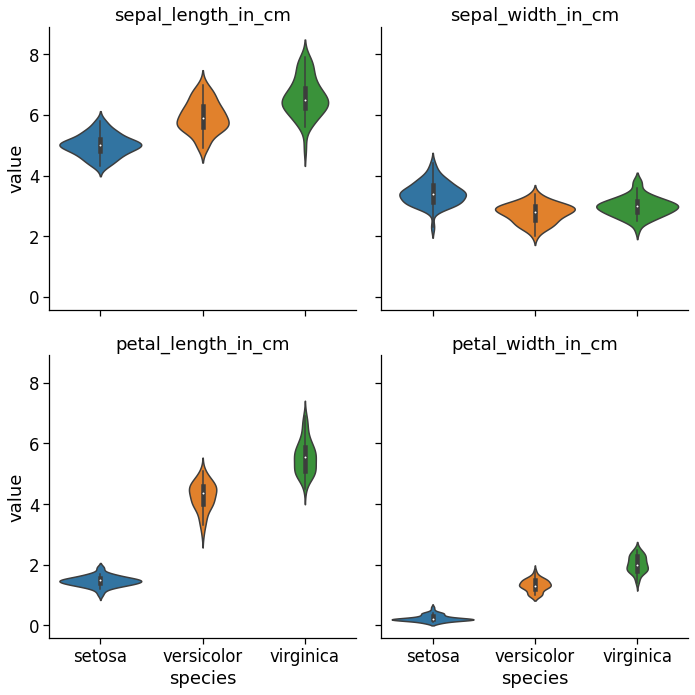

In [7]:
df1 = pd.melt(iris, id_vars=['genus', 'species'])
g = sns.catplot(
    data=df1, 
    x='species',
    y='value',
    col='variable',
    col_wrap=2,
    kind='violin',
)
g.set_titles('{col_name}')
pass

**5**. Using `joypy`, create the following plot from the `iris` DataFrame from Q2. You may have to pip install `joypy` first.

<img src="ex4_q5.png" alt="plot" width="400"/>

In [8]:
import joypy

In [9]:
columns

['sepal_length_in_cm',
 'sepal_width_in_cm',
 'petal_length_in_cm',
 'petal_width_in_cm',
 'class']

In [10]:
iris.head(3)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,genus,species
0,5.1,3.5,1.4,0.2,Iris,setosa
1,4.9,3.0,1.4,0.2,Iris,setosa
2,4.7,3.2,1.3,0.2,Iris,setosa


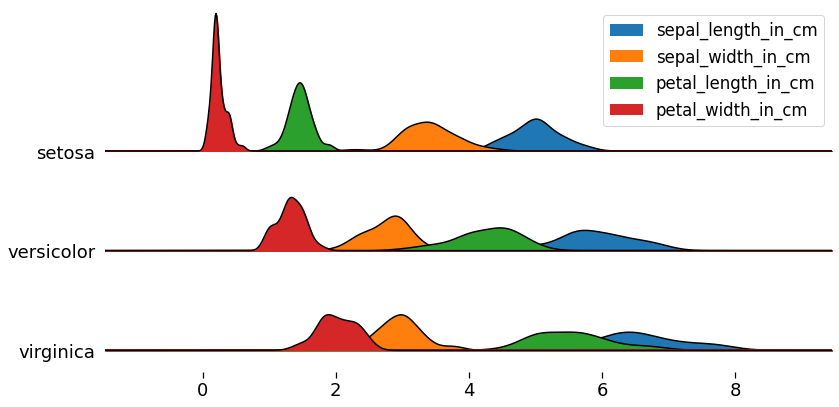

In [11]:
fig, ax = joypy.joyplot(
    iris.groupby('species'), 
    column = columns[:-1],
    legend=True, 
    figsize=(12,6)
)